In [1]:
import ROOT
from ROOT import RooRealVar,RooCBShape,RooDataHist,RooArgList,RooFit
import glob
import os

Welcome to JupyROOT 6.26/08

RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt



In [24]:
#/eos/cms/store/group/dpg_ecal/comm_ecal/upgrade/testbeam/ECALTB_H4_Oct2021/HighPurity/ntuples_fitVFEs/
run=14982
path="/eos/cms/store/group/dpg_ecal/comm_ecal/upgrade/testbeam/ECALTB_H4_Oct2021/HighPurity/ntuples_fitVFEs/%s/*"%run
#path
allfiles_list = [f for f in glob.glob(path) if f.endswith(".root")]
tree = ROOT.TChain("h4")

#entry=0
for file in allfiles_list:
    #print(file)
    #fil=ROOT.TFile(file)
    #test=fil.Get("h4")
    #entry+=test.GetEntries()
    #print(test.GetEntries())
    tree.Add(file)
print(tree.GetEntries())
#print("entry",entry)
#file = ROOT.TFile("/eos/cms/store/group/dpg_ecal/comm_ecal/upgrade/testbeam/ECALTB_H4_Oct2018/ntuples_v5/ECAL_H4_October2018_13376.root")

108292


In [14]:
#allfiles_list

'\nhtemp = ROOT.gPad.GetPrimitive("hhnew")\nxx, yy, zz = int(0), int(0), int(0)\nhtemp.GetBinXYZ(htemp.GetMaximumBin(), xx,yy,zz);\nprint (xx,yy)\nprint (htemp.GetXaxis().GetBinCenter(21))\nprint (htemp.GetYaxis().GetBinCenter(23))\n'

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TFile::Append>: Replacing existing TH1: hh (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c2


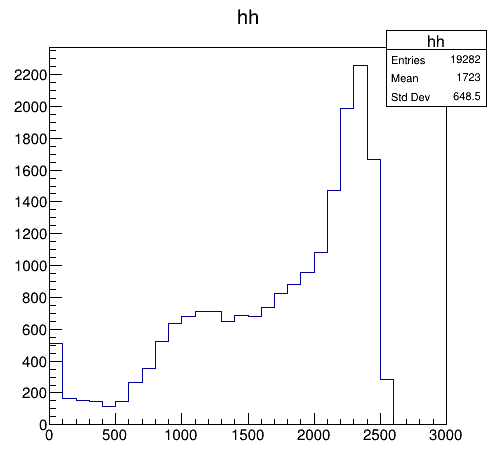

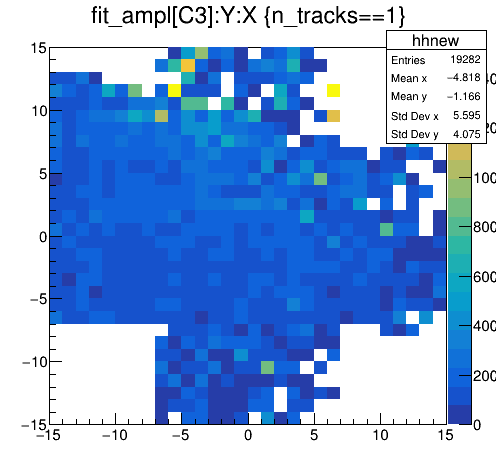

In [40]:
c = ROOT.TCanvas("c","c",500,500)
#tree.Draw("fit_ampl[C3]>>hh(50,0,1000)","n_tracks==1")
#hh = ROOT.TH1F("hh","hh",50,4000,5500)
#tree.Draw("fit_ampl[C2]>>hh","n_tracks==1 && fabs(X+5.5)<3 && fabs(Y-7.5)<3","")
hh = ROOT.TH1F("hh","hh",30,0,3000)
#tree.Draw("fit_ampl[C2]>>hh","n_tracks==1 && fabs(X+5.5)<4 && fabs(Y-7.5)<4")
tree.Draw("fit_ampl[C2]>>hh","n_tracks==1")
c.Draw()

c2 = ROOT.TCanvas("c2","c2",500,500)
c2.cd()
tree.Draw("fit_ampl[C3]:Y:X>>hhnew(30,-15,15,30,-15,15,0,1000)","n_tracks==1","PROFCOLZ")
c2.Draw()
'''
htemp = ROOT.gPad.GetPrimitive("hhnew")
xx, yy, zz = int(0), int(0), int(0)
htemp.GetBinXYZ(htemp.GetMaximumBin(), xx,yy,zz);
print (xx,yy)
print (htemp.GetXaxis().GetBinCenter(21))
print (htemp.GetYaxis().GetBinCenter(23))
'''

[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeConst: activating const optimization
 **********
 **   11 **SET PRINT           1
 **********
 **********
 **   12 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 alpha_test   5.00000e-01  2.50000e-01    0.00000e+00  1.00000e+01
     2 exp_test     7.00000e+00  3.50000e+00    0.00000e+00  1.50000e+02
     3 mean_test    2.50000e+03  1.00000e+02    2.00000e+03  3.00000e+03
     4 sigma_test   6.00000e+01  3.00000e+01    0.00000e+00  5.00000e+02
 **********
 **   13 **SET ERR         0.5
 **********
 **********
 **   14 **SET PRINT           1
 **********
 **********
 **   15 **SET STR           1
 **********
 NOW USING STRATEGY  1: TRY TO BALANCE SPEED AGAINST RELIABILITY
 **********
 **   16 **MIGRAD        2000           1
 **********
 FIRST CALL TO USER FUNCTION AT NEW START POINT, WITH IFLAG=4.
 START MIGRAD MINIMIZATION.  STRATEGY  1.  CONVERGENCE WHEN EDM .LT. 1

Warning in <TCanvas::Constructor>: Deleting canvas with same name: cfit


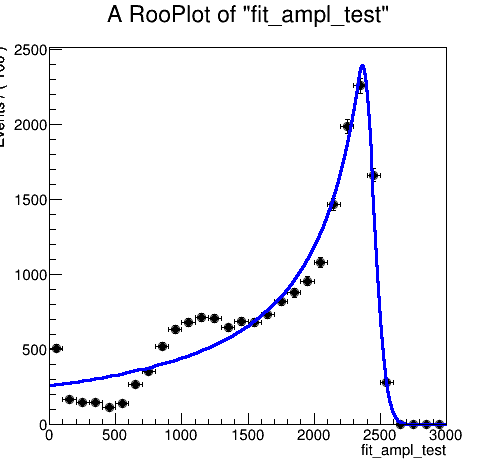

In [42]:
C ='test'
x  = RooRealVar("fit_ampl_%s"%C,"fit_ampl_%s"%C,0,3000)
roohist = RooDataHist("roohist_fit_%s"%C,"roohist_fit_%s"%C,RooArgList(x),hh)

m  = RooRealVar("mean_%s"%C,"mean_%s"%C,2500,2000,3000)
s  = RooRealVar("sigma_%s"%C,"sigma_%s"%C,60,0,500)
a  = RooRealVar("alpha_%s"%C,"alpha_%s"%C,0.5,0,10)
n  = RooRealVar("exp_%s"%C,"exp_%s"%C,7,0,150)
sig = RooCBShape("signal_%s"%C,"signal_%s"%C,x,m,s,a,n)

res = sig.fitTo(roohist,RooFit.Save())
res.Print()

canvas = ROOT.TCanvas("cfit","cfit",500,500)
frame = x.frame()
roohist.plotOn(frame,RooFit.Name("roohist_test"))
sig.plotOn(frame,RooFit.Name("signal_test"))
frame.Draw()
canvas.Draw()

In [44]:
print ('Reduced chi2 : ',frame.chiSquare("signal_test","roohist_test",4)) # 4 = nFitParameters from CB

Reduced chi2 :  64.13163642093576


In [46]:
print ('results :')
print ('mean = %.2f'%m.getVal())
print ('sigma = %.2f'%s.getVal())
print ('n = %.2f'%n.getVal())
print ('alpha = %.2f'%a.getVal())

results :
mean = 2361.56
sigma = 91.69
n = 1.20
alpha = 0.24


AttributeError: 'PyROOT_NoneType' object has no attribute 'Draw'

Warning in <TSelectorDraw::Begin>: Deleting old histogram with different dimensions


<ROOT.TH1F object ("hh") at 0x8b64c50>